In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
import pyspark.sql.functions as F

In [ ]:
spark = SparkSession.builder.getOrCreate()

##Data Analysis

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/train.csv", inferSchema=True,
                   header=True)
df

DataFrame[id: int, perc_premium_paid_by_cash_credit: double, age_in_days: int, Income: int, Count_3-6_months_late: int, Count_6-12_months_late: int, Count_more_than_12_months_late: int, application_underwriting_score: double, no_of_premiums_paid: int, sourcing_channel: string, residence_area_type: string, premium: int, target: int]

In [ ]:
df.show()

+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+-------+------+
|    id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|premium|target|
+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+-------+------+
|110936|                           0.429|      12058|355060|                    0|                     0|                             0|                         99.02|                 13|               C|              Urban|   3300|     1|
| 41492|                            0.01

In [ ]:
df.count()

79853

In [ ]:
len(df.columns)

13

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- perc_premium_paid_by_cash_credit: double (nullable = true)
 |-- age_in_days: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Count_3-6_months_late: integer (nullable = true)
 |-- Count_6-12_months_late: integer (nullable = true)
 |-- Count_more_than_12_months_late: integer (nullable = true)
 |-- application_underwriting_score: double (nullable = true)
 |-- no_of_premiums_paid: integer (nullable = true)
 |-- sourcing_channel: string (nullable = true)
 |-- residence_area_type: string (nullable = true)
 |-- premium: integer (nullable = true)
 |-- target: integer (nullable = true)



In [ ]:
df1 = spark.read.csv("/content/drive/MyDrive/test.csv", inferSchema=True,
                   header=True)
df1

DataFrame[id: int, perc_premium_paid_by_cash_credit: double, age_in_days: int, Income: int, Count_3-6_months_late: int, Count_6-12_months_late: int, Count_more_than_12_months_late: int, application_underwriting_score: double, no_of_premiums_paid: int, sourcing_channel: string, residence_area_type: string]

In [ ]:
df1.show()

+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
|    id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|
+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
|   649|                           0.001|      27384| 51150|                    0|                     0|                             0|                         99.89|                  7|               A|              Rural|
| 81136|                           0.124|      23735|285140|                    0|                  

In [ ]:
df1.count()

34224

In [ ]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- perc_premium_paid_by_cash_credit: double (nullable = true)
 |-- age_in_days: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Count_3-6_months_late: integer (nullable = true)
 |-- Count_6-12_months_late: integer (nullable = true)
 |-- Count_more_than_12_months_late: integer (nullable = true)
 |-- application_underwriting_score: double (nullable = true)
 |-- no_of_premiums_paid: integer (nullable = true)
 |-- sourcing_channel: string (nullable = true)
 |-- residence_area_type: string (nullable = true)



In [ ]:
len(df1.columns)

11

In [ ]:
df=df.drop('Premium')
df.show()

+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
|    id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|target|
+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
|110936|                           0.429|      12058|355060|                    0|                     0|                             0|                         99.02|                 13|               C|              Urban|     1|
| 41492|                            0.01|      21546|315150|            

In [ ]:
df.groupBy("Count_3-6_months_late").count().show()

+---------------------+-----+
|Count_3-6_months_late|count|
+---------------------+-----+
|                   12|    1|
|                 NULL|   97|
|                    1| 8826|
|                   13|    1|
|                    6|   68|
|                    3|  954|
|                    5|  168|
|                    9|    4|
|                    4|  374|
|                    8|   15|
|                    7|   23|
|                   10|    1|
|                   11|    1|
|                    2| 2519|
|                    0|66801|
+---------------------+-----+



In [ ]:
df.groupBy("Count_6-12_months_late").count().show()

+----------------------+-----+
|Count_6-12_months_late|count|
+----------------------+-----+
|                    12|    1|
|                  NULL|   97|
|                     1| 2680|
|                    13|    2|
|                     6|   26|
|                     3|  317|
|                     5|   46|
|                    15|    1|
|                    17|    1|
|                     9|    4|
|                     4|  130|
|                     8|    5|
|                     7|   11|
|                    10|    4|
|                    11|    2|
|                    14|    2|
|                     2|  693|
|                     0|75831|
+----------------------+-----+



In [ ]:
df.groupBy("Count_more_than_12_months_late").count().show()

+------------------------------+-----+
|Count_more_than_12_months_late|count|
+------------------------------+-----+
|                          NULL|   97|
|                             1| 2996|
|                             6|    6|
|                             3|  151|
|                             5|   13|
|                             4|   48|
|                             8|    2|
|                             7|    3|
|                            11|    1|
|                             2|  498|
|                             0|76038|
+------------------------------+-----+



In [ ]:
from pyspark.sql.functions import col

value_counts = df.groupBy("target").count().orderBy(col("target"))
value_counts.show()

+------+-----+
|target|count|
+------+-----+
|     0| 4998|
|     1|74855|
+------+-----+



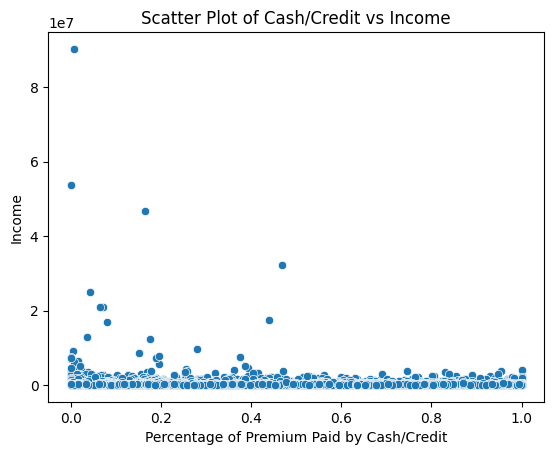

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train_pd = df.select("perc_premium_paid_by_cash_credit", "Income").toPandas()


sns.scatterplot(
    x=train_pd['perc_premium_paid_by_cash_credit'],
    y=train_pd['Income']
)
plt.xlabel("Percentage of Premium Paid by Cash/Credit")
plt.ylabel("Income")
plt.title("Scatter Plot of Cash/Credit vs Income")
plt.show()


This plot shows the following:

The customers who earn less than Rs 1 crore monthly as salary pay 0 to 100 % of their premium by either cash or credit card.
The high income customers pay in range 0% to 50% of their premium by either cash or credit card.
The customer who earns around 9 crore a month pays 0% premium either by cash or credit card.
The customer who earns around 5 crore a month pays 20% premium by cash or credit card.
The customer who earns over 3 crore a month pays 50% premium by cash or credit card.
It seems the high income group must be using some other means to pay majority of their premium.

+------+------------------+
|target|        avg_income|
+------+------------------+
|     1|210969.65172667155|
|     0|177058.79951980792|
+------+------------------+



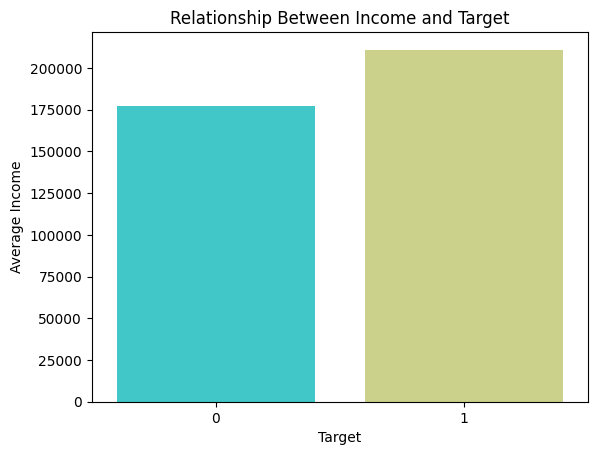

In [ ]:
from pyspark.sql.functions import avg

# Aggregate to compute the average income for each target
avg_income = df.groupBy("target").agg(avg("Income").alias("avg_income"))
avg_income.show()

avg_income_pd = avg_income.toPandas()

sns.barplot(
    x=avg_income_pd['target'],
    y=avg_income_pd['avg_income'],
    hue=avg_income_pd['target'],
    palette='rainbow',
    err_kws={'color': 'c', 'linewidth': 0.26},
    legend=False
)
plt.xlabel("Target")
plt.ylabel("Average Income")
plt.title("Relationship Between Income and Target")
plt.show()

This shows that the customers who earn under Rs 1,80,000 a month are the ones the insurance company should be worried about. As they are the ones who did not pay their premiums on time.

In [ ]:
crosstab_result = (
    df.groupBy("target")
    .pivot("residence_area_type")
    .count()
)
crosstab_result.show()

+------+-----+-----+
|target|Rural|Urban|
+------+-----+-----+
|     1|29672|45183|
|     0| 1998| 3000|
+------+-----+-----+



This two-way table is displaying the following:

The number of customers from both rural & urban residence area type who didn't pay their premium on time & also those who payed their premium on time.
The number 0 on the target column represents those customers who didn't pay their premium on time.
The number 1 on the target column represents the customers who paid their premium on time.
The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

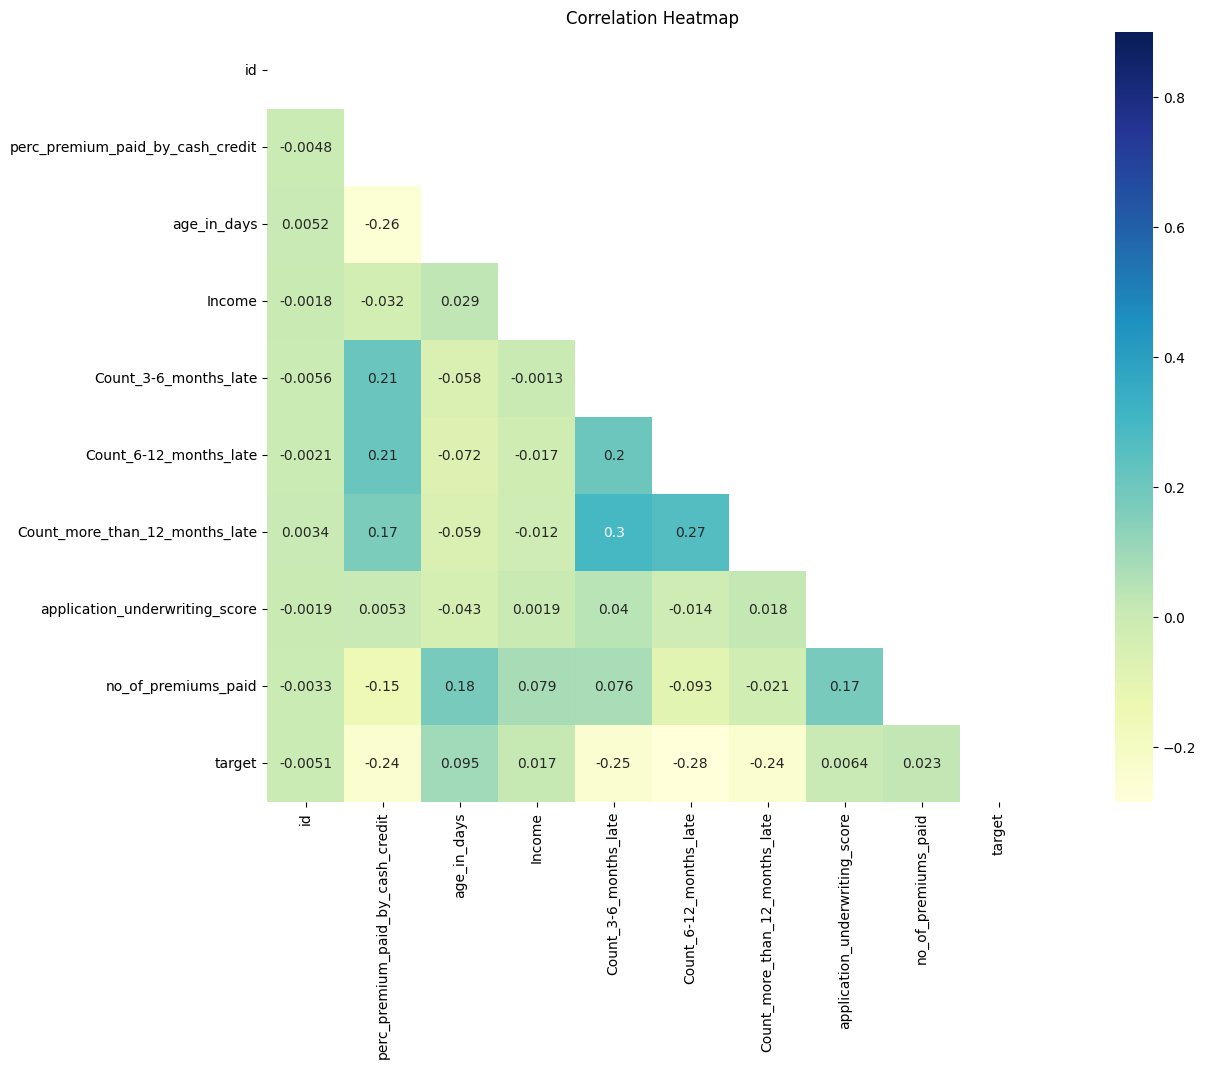

In [ ]:
import pandas as pd
import numpy as np
numeric_columns = [col_name for col_name, dtype in df.dtypes if dtype in ['int', 'double']]

# Compute correlations for all numeric columns
from pyspark.sql.functions import col
correlations = {}
for col1 in numeric_columns:
    row_corr = []
    for col2 in numeric_columns:
        corr_value = df.stat.corr(col1, col2)
        row_corr.append(corr_value)
    correlations[col1] = row_corr

corr_matrix = pd.DataFrame(correlations, index=numeric_columns, columns=numeric_columns)

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    vmax=0.9,
    square=True,
    annot=True,
    cmap='YlGnBu'
)
plt.title("Correlation Heatmap")
plt.show()


MISSING VALUES IN TEST AND TRAIN

In [ ]:
from pyspark.sql.functions import col, sum as _sum

# Calculate the number of nulls for each column
null_counts = df.select([
    _sum(col(column).isNull().cast("int")).alias(column)
    for column in df.columns
])

null_counts.show()

+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
| id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|target|
+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
|  0|                               0|          0|     0|                   97|                    97|                            97|                          2974|                  0|               0|                  0|     0|
+---+--------------------------------+-----------+------+---------------------+-----

In [ ]:
df = df.fillna({
    'Count_3-6_months_late': 0,
    'Count_6-12_months_late': 0,
    'Count_more_than_12_months_late': 0
})

mean_value = df.agg({'application_underwriting_score': 'mean'}).collect()[0][0]

# Step 2: Fill null values with the mean
df = df.fillna({'application_underwriting_score': mean_value})

In [ ]:
null_counts = df.select([
    _sum(col(column).isNull().cast("int")).alias(column)
    for column in df.columns
])

null_counts.show()

+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
| id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|target|
+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+
|  0|                               0|          0|     0|                    0|                     0|                             0|                             0|                  0|               0|                  0|     0|
+---+--------------------------------+-----------+------+---------------------+-----

In [ ]:
null_counts = df1.select([
    _sum(col(column).isNull().cast("int")).alias(column)
    for column in df1.columns
])

null_counts.show()

+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
| id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|
+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
|  0|                               0|          0|     0|                   31|                    31|                            31|                          1323|                  0|               0|                  0|
+---+--------------------------------+-----------+------+---------------------+----------------------+----------

In [ ]:
df1 = df1.fillna({
    'Count_3-6_months_late': 0,
    'Count_6-12_months_late': 0,
    'Count_more_than_12_months_late': 0
})

mean_value = df1.agg({'application_underwriting_score': 'mean'}).collect()[0][0]

# Step 2: Fill null values with the mean
df1 = df1.fillna({'application_underwriting_score': mean_value})

In [ ]:
null_counts = df1.select([
    _sum(col(column).isNull().cast("int")).alias(column)
    for column in df1.columns
])

null_counts.show()

+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
| id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|
+---+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+
|  0|                               0|          0|     0|                    0|                     0|                             0|                             0|                  0|               0|                  0|
+---+--------------------------------+-----------+------+---------------------+----------------------+----------

##MODELS

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [ ]:
indexer=StringIndexer(inputCol= "sourcing_channel",outputCol='sourcing_channel_index')
indexed=indexer.fit(indexed).transform(indexed)

IllegalArgumentException: requirement failed: Output column sourcing_channel_index already exists.

In [ ]:
indexer=StringIndexer(inputCol= "residence_area_type",outputCol='residence_area_type_index')
indexed=indexer.fit(indexed).transform(indexed)

IllegalArgumentException: requirement failed: Output column residence_area_type_index already exists.

In [ ]:
indexed.show()

+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+-------------------------+----------------------+
|    id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|target|residence_area_type_index|sourcing_channel_index|
+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+-------------------------+----------------------+
|110936|                           0.429|      12058|355060|                    0|                     0|                             0|                     

In [ ]:
indexed.columns

['id',
 'perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'sourcing_channel',
 'residence_area_type',
 'target',
 'residence_area_type_index',
 'sourcing_channel_index']

In [ ]:
assembler= VectorAssembler(inputCols=['perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'residence_area_type_index',
 'sourcing_channel_index'],outputCol='features')

In [ ]:
assembler


VectorAssembler_565cf5d42096

In [ ]:
output= assembler.transform(indexed)

In [ ]:
output

DataFrame[id: int, perc_premium_paid_by_cash_credit: double, age_in_days: int, Income: int, Count_3-6_months_late: int, Count_6-12_months_late: int, Count_more_than_12_months_late: int, application_underwriting_score: double, no_of_premiums_paid: int, sourcing_channel: string, residence_area_type: string, target: int, residence_area_type_index: double, sourcing_channel_index: double, features: vector]

In [ ]:
output.show()

+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+-------------------------+----------------------+--------------------+
|    id|perc_premium_paid_by_cash_credit|age_in_days|Income|Count_3-6_months_late|Count_6-12_months_late|Count_more_than_12_months_late|application_underwriting_score|no_of_premiums_paid|sourcing_channel|residence_area_type|target|residence_area_type_index|sourcing_channel_index|            features|
+------+--------------------------------+-----------+------+---------------------+----------------------+------------------------------+------------------------------+-------------------+----------------+-------------------+------+-------------------------+----------------------+--------------------+
|110936|                           0.429|      12058|355060|                    0|            

In [ ]:
output.select('features','target').show(10)

+--------------------+------+
|            features|target|
+--------------------+------+
|[0.429,12058.0,35...|     1|
|(10,[0,1,2,6,7],[...|     1|
|[0.917,17531.0,84...|     0|
|(10,[0,1,2,6,7],[...|     1|
|[0.052,31400.0,19...|     1|
|[0.54,17527.0,282...|     1|
|[1.0,24829.0,1184...|     1|
|[1.0,21911.0,1802...|     0|
|(10,[0,1,2,6,7],[...|     1|
|[0.908,23008.0,10...|     0|
+--------------------+------+
only showing top 10 rows



In [ ]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(output)
output = scaler_model.transform(output)

output.select("features", "scaled_features").show(truncate=False)

+-----------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                         |scaled_features                                                                                                                                                                            |
+-----------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13.0,0.0,2.0]          |[1.2809236870590013,2.3149645211698173,0.7150069333096529,0.0,0.0,0.0,136.4115154785308,2.5141725657889227,0.0,1.9010322302805522]                                   

In [ ]:
output.select('scaled_features','target').show(10)

+--------------------+------+
|     scaled_features|target|
+--------------------+------+
|[1.28092368705900...|     1|
|(10,[0,1,2,6,7],[...|     1|
|[2.73801170403987...|     0|
|(10,[0,1,2,6,7],[...|     1|
|[0.15526347721927...|     1|
|[1.61235149420014...|     1|
|[2.98583610037063...|     1|
|[2.98583610037063...|     0|
|(10,[0,1,2,6,7],[...|     1|
|[2.71113917913653...|     0|
+--------------------+------+
only showing top 10 rows



In [ ]:
model_df=output.select(['scaled_features','target'])

In [ ]:
training_df,test_df=model_df.randomSplit([0.7,0.3])

In [ ]:
print(training_df.count())
print(test_df.count())

55804
24049


###logistic regression


In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
log_reg=LogisticRegression(labelCol='target',featuresCol='scaled_features').fit(training_df)

In [ ]:
predictions = log_reg.transform(test_df)
predictions.select('target', 'prediction', 'probability').show(10)

+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.02374724740336...|
|     1|       1.0|[0.02109687028257...|
|     1|       1.0|[0.02137676212600...|
|     1|       1.0|[0.02201645247211...|
|     1|       1.0|[0.02035485681106...|
|     1|       1.0|[0.02507500737207...|
|     1|       1.0|[0.01784300428928...|
|     1|       1.0|[0.02052270320040...|
|     1|       1.0|[0.02339910796753...|
|     1|       1.0|[0.01796489243319...|
+------+----------+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")


AUC: 0.5660877670271032


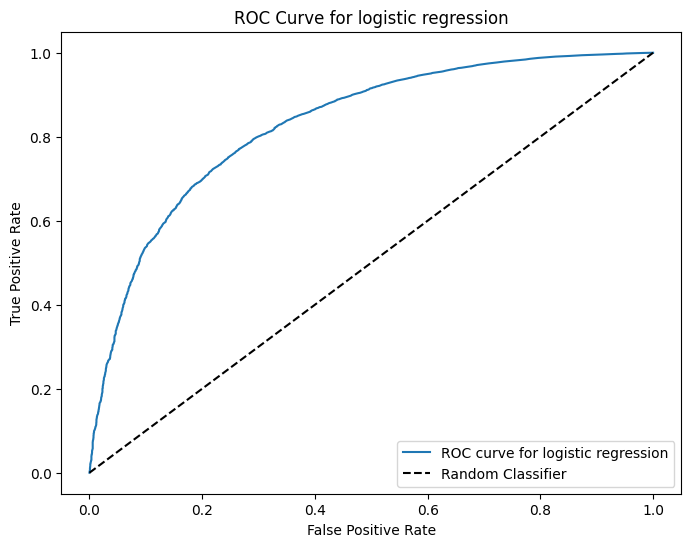

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import numpy as np

# Extract the ROC curve data
roc = log_reg.summary.roc.toPandas()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC curve for logistic regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming predictions are already made and stored in the `predictions` DataFrame

# Initialize evaluators for different metrics
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="f1")
weighted_f1_evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="weightedFMeasure")

# Compute the metrics
accuracy = accuracy_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)
weighted_f1 = weighted_f1_evaluator.evaluate(predictions)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1_score}")
print(f"Weighted F1-Score: {weighted_f1}")

Accuracy: 0.9383342342716953
F1-Score: 0.9207291656703331
Weighted F1-Score: 0.9207291656703331


###random forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier


# Initialize the Random Forest classifier
rf = RandomForestClassifier(labelCol="target", featuresCol="scaled_features", numTrees=100)

# Train the model
rf_model = rf.fit(training_df)

# Make predictions
rf_predictions = rf_model.transform(test_df)

# Evaluate the Random Forest model
rf_accuracy = accuracy_evaluator.evaluate(rf_predictions)
rf_f1 = f1_evaluator.evaluate(rf_predictions)


# Print the Random Forest evaluation metrics
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest F1-Score: {rf_f1}")



Random Forest Accuracy: 0.9388332155183168
Random Forest F1-Score: 0.9159131277244983


+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03619747062366...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
|     1|       1.0|[0.03484397461047...|
+------+----------+--------------------+
only showing top 10 rows

AUC: 0.5381926649697971


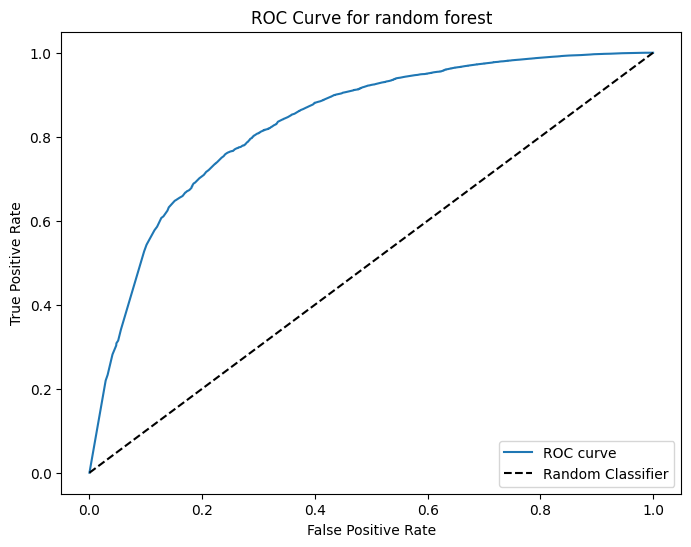

In [ ]:
rf_predictions.select('target', 'prediction', 'probability').show(10)

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(rf_predictions)
print(f"AUC: {auc}")

# Extract the ROC curve data
roc = rf_model.summary.roc.toPandas()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for random forest')
plt.legend(loc='lower right')
plt.show()

###decision tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="target", featuresCol="scaled_features")

# Train the model
dt_model = dt.fit(training_df)

# Make predictions
dt_predictions = dt_model.transform(test_df)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_evaluator.evaluate(dt_predictions)
dt_f1 = f1_evaluator.evaluate(dt_predictions)


# Print the Decision Tree evaluation metrics
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree F1-Score: {dt_f1}")

Decision Tree Accuracy: 0.9379184165661774
Decision Tree F1-Score: 0.9203458831930572


In [ ]:
dt_predictions.select('target', 'prediction', 'probability').show(10)

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(dt_predictions)
print(f"AUC: {auc}")

+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
|     1|       1.0|[0.04646609180253...|
+------+----------+--------------------+
only showing top 10 rows

AUC: 0.5652535956261879


###Gradient-Boosted Tree

In [ ]:
from pyspark.ml.classification import GBTClassifier

# Initialize the Gradient-Boosted Tree classifier
gbt = GBTClassifier(labelCol="target", featuresCol="scaled_features", maxIter=10)

# Train the model
gbt_model = gbt.fit(training_df)

# Make predictions
gbt_predictions = gbt_model.transform(test_df)

# Evaluate the GBT model
gbt_accuracy = accuracy_evaluator.evaluate(gbt_predictions)
gbt_f1 = f1_evaluator.evaluate(gbt_predictions)

# Print the GBT evaluation metrics
print(f"GBT Accuracy: {gbt_accuracy}")
print(f"GBT F1-Score: {gbt_f1}")

GBT Accuracy: 0.9384589795833507
GBT F1-Score: 0.9190931399958547


In [ ]:
gbt_predictions.select('target', 'prediction', 'probability').show(10)

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(gbt_predictions)
print(f"AUC: {auc}")

+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07928745268765...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
|     1|       1.0|[0.07154378578305...|
+------+----------+--------------------+
only showing top 10 rows

AUC: 0.5560529631506577


###Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes

# Initialize the Naive Bayes classifier
nb = NaiveBayes(labelCol="target", featuresCol="scaled_features")

# Train the model
nb_model = nb.fit(training_df)

# Make predictions
nb_predictions = nb_model.transform(test_df)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_evaluator.evaluate(nb_predictions)
nb_f1 = f1_evaluator.evaluate(nb_predictions)


# Print the Naive Bayes evaluation metrics
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes F1-Score: {nb_f1}")


Naive Bayes Accuracy: 0.9084369412449582
Naive Bayes F1-Score: 0.9147363176046545


In [ ]:
nb_predictions.select('target', 'prediction', 'probability').show(10)

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(nb_predictions)
print(f"AUC: {auc}")

+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.00134819343766...|
|     1|       1.0|[0.00131432770342...|
|     1|       1.0|[0.00130007837450...|
|     1|       1.0|[0.00118665677825...|
|     1|       1.0|[0.00113934222695...|
|     1|       1.0|[0.00108813776288...|
|     1|       1.0|[0.00118903134468...|
|     1|       1.0|[9.93254962377225...|
|     1|       1.0|[8.24811279136619...|
|     1|       1.0|[9.80610137122744...|
+------+----------+--------------------+
only showing top 10 rows

AUC: 0.6961394840216447


###SVM

In [ ]:
from pyspark.ml.classification import LinearSVC

# Initialize the Support Vector Machine classifier
svm = LinearSVC(labelCol="target", featuresCol="scaled_features")

# Train the model
svm_model = svm.fit(training_df)

# Make predictions
svm_predictions = svm_model.transform(test_df)

# Evaluate the SVM model
svm_accuracy = accuracy_evaluator.evaluate(svm_predictions)
svm_f1 = f1_evaluator.evaluate(svm_predictions)
# svm_precision = precision_evaluator.evaluate(svm_predictions)
# svm_recall = recall_evaluator.evaluate(svm_predictions)

# Print the SVM evaluation metrics
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM F1-Score: {svm_f1}")
# print(f"SVM Precision: {svm_precision}")
# print(f"SVM Recall: {svm_recall}")


SVM Accuracy: 0.9366709634496236
SVM F1-Score: 0.9060418732223822


In [ ]:
# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol='prediction')

# Compute the AUC score
auc = evaluator.evaluate(svm_predictions)
print(f"AUC: {auc}")

AUC: 0.5


###ROC curves together

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate predictions and compute metrics
def evaluate_predictions(predictions, model_name):
    evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="probability", metricName="areaUnderROC")

    # ROC AUC Score
    roc_auc = evaluator.evaluate(predictions)
    print(f"{model_name} ROC AUC: {roc_auc}")

    # Extract labels and probabilities for ROC Curve
    labels = predictions.select('target').rdd.flatMap(lambda x: x).collect()
    probs = predictions.select('probability').rdd.flatMap(lambda x: x).collect()
    positive_class_probs = [prob[1] for prob in probs]

    return {
        'roc_auc': roc_auc,
        'labels': np.array(labels),
        'positive_class_probs': np.array(positive_class_probs)
    }

# Initialize models and their predictions (replace with your variables)
models_and_predictions = [
    ("Logistic Regression", predictions),
    ("Decision Tree", dt_predictions),
    ("Random Forest", rf_predictions),
    ("Gradient-Boosted Tree", gbt_predictions),
    ("Naive Bayes", nb_predictions),
    ("SVM", svm_predictions)
]

# Plot initialization
plt.figure(figsize=(12, 8))

# Iterate over predictions from each model
for model_name, predictions in models_and_predictions:
    results = evaluate_predictions(predictions, model_name)

    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(results['labels'], results['positive_class_probs'])

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} ROC AUC = {results["roc_auc"]:.2f}')

# General Plot Details
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classification Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()


IllegalArgumentException: probability does not exist. Available: scaled_features, target, rawPrediction, prediction

<Figure size 1200x800 with 0 Axes>